In [1]:
!python -m venv venv && source venv/bin/activate
!pip install --upgrade pip
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118  # cope cuda 
!pip install monai[nib] nibabel numpy scikit-image tqdm matplotlib albumentations pytorch-lightning
!pip install gradio  # present

Error: Command '['/kaggle/working/venv/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 97.8 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 40.1 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 105.2 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 49.6 MB/s  0:00:07
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 69.0 MB/s  0:00:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
!git clone https://github.com/sarametawea27/aortic_seg2.git

Cloning into 'aortic_seg2'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 7.45 KiB | 3.72 MiB/s, done.


In [3]:
!ls /root/.kaggle

ls: cannot access '/root/.kaggle': No such file or directory


In [4]:
import os
os.listdir('/content')

['.config', 'sample_data']

In [5]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [6]:
!ls /root/.kaggle

ls: cannot access '/root/.kaggle': No such file or directory


In [7]:
!ls /content/aortic_seg

ls: cannot access '/content/aortic_seg': No such file or directory


In [8]:
!ls /content/aortic_seg

ls: cannot access '/content/aortic_seg': No such file or directory


In [9]:
!pip install numpy pandas matplotlib seaborn scikit-learn opencv-python

In [10]:
!pip install nibabel pydicom SimpleITK


In [11]:
!pip install nibabel pydicom SimpleITK


In [12]:
!pip install albumentations

In [13]:
!pip install --upgrade --force-reinstall numpy
!pip install albumentations numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 103.1 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.2 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
mkl-umath 0.1.1 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.3.2 which is incompatible.
mkl-random 1.2.4 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.3.2 which is incompatible.
mkl-fft 1.3.8 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.3.2 which is incompatible.
cupy-cuda12x 13.4.1 requires num

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import nibabel as nib
import pydicom
import SimpleITK as sitk
import os
import cv2

# Dowenload data 

In [15]:
import os
import cv2

# Correct paths
train_img_path = "/kaggle/input/aortic-seg/data/slices/train/img"
train_mask_path = "/kaggle/input/aortic-seg/data/slices/train/mask"

test_img_path = "/kaggle/input/aortic-seg/data/slices/test/img"
test_mask_path = "/kaggle/input/aortic-seg/data/slices/test/mask"

predict_img_path = "/kaggle/input/aortic-seg/data/slices/predict/img"
predict_mask_path = "/kaggle/input/aortic-seg/data/slices/predict/mask"

# Function to load all images from a folder
def load_images_from_folder(folder):
    images = []
    filenames = sorted(os.listdir(folder))  # Sort filenames to keep order
    for filename in filenames:
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)  # Load image as-is
        if img is not None:
            images.append(img)
    return images

# Load all images and masks
train_images = load_images_from_folder(train_img_path)
train_masks = load_images_from_folder(train_mask_path)

test_images = load_images_from_folder(test_img_path)
test_masks = load_images_from_folder(test_mask_path)

predict_images = load_images_from_folder(predict_img_path)
predict_masks = load_images_from_folder(predict_mask_path)

# Verify loading
print(os.listdir(train_img_path))
print(os.listdir(train_mask_path))


['img']
['img']


In [16]:
# Example: path to your uploaded dataset in Kaggle
DATA_DIR = "/kaggle/input/aortic-seg"

# List files to verify
import os
print("Dataset files:", os.listdir(DATA_DIR))


Dataset files: ['data']


In [17]:
import os
train_img_path = "/kaggle/input/aortic-seg/data/slices/train/img"
print("Files in train image folder:", os.listdir(train_img_path))

Files in train image folder: ['img']


In [18]:
import os

train_img_path = "/kaggle/input/aortic-seg/data/slices/train/img"
files = sorted(os.listdir(train_img_path))
print("Files:", files[:5])  # show first 5 files

Files: ['img']


First 5 files: ['aorta1-slice000_z.png', 'aorta1-slice001_z.png', 'aorta1-slice002_z.png', 'aorta1-slice003_z.png', 'aorta1-slice004_z.png']
Image shape: (512, 512)


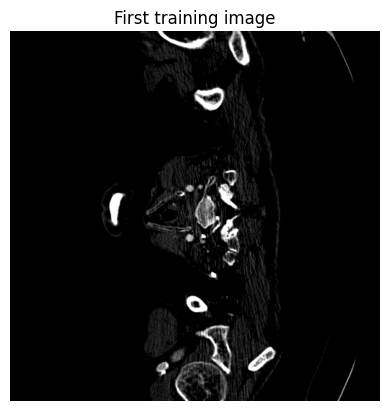

In [19]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to first train images subfolder
train_img_subfolder = "/kaggle/input/aortic-seg/data/slices/train/img/img"

# List PNG files
files = sorted(os.listdir(train_img_subfolder))
print("First 5 files:", files[:5])

# Load first image with OpenCV
first_img_path = os.path.join(train_img_subfolder, files[0])
img = cv2.imread(first_img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

print("Image shape:", img.shape)

# Display image
plt.imshow(img, cmap='gray')
plt.title("First training image")
plt.axis('off')
plt.show()


In [20]:
import os
import cv2

train_img_subfolder = "/kaggle/input/aortic-seg/data/slices/train/img/img"
files = sorted(os.listdir(train_img_subfolder))

# Load only first 50 images for testing
train_images = []
for f in files[:50]:
    path = os.path.join(train_img_subfolder, f)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        train_images.append(img)

print("Number of loaded images:", len(train_images))
print("Shape of first image:", train_images[0].shape)


Number of loaded images: 50
Shape of first image: (512, 512)


In [21]:
import os
import cv2

test_img_subfolder = "/kaggle/input/aortic-seg/data/slices/test/img/img"
files = sorted(os.listdir(test_img_subfolder))

# Load only first 50 images for testing
test_images = []
for f in files[:50]:
    path = os.path.join(test_img_subfolder, f)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        test_images.append(img)

print("Number of loaded images:", len(test_images))

Number of loaded images: 50


In [22]:
import os
import cv2

# Path to masks
train_mask_subfolder = "/kaggle/input/aortic-seg/data/slices/train/mask/img"
mask_files = sorted(os.listdir(train_mask_subfolder))

train_masks = []
for f in mask_files:
    path = os.path.join(train_mask_subfolder, f)
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # load as grayscale
    if mask is not None:
        train_masks.append(mask)

print("Number of loaded masks:", len(train_masks))

Number of loaded masks: 5144


In [23]:
import os
import cv2

# Path to masks
test_mask_subfolder = "/kaggle/input/aortic-seg/data/slices/test/mask/img"
mask_files = sorted(os.listdir(test_mask_subfolder))

test_masks = []
for f in mask_files:
    path = os.path.join(test_mask_subfolder, f)
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # load as grayscale
    if mask is not None:
        test_masks.append(mask)

print("Number of loaded masks:", len(test_masks))

Number of loaded masks: 145


In [24]:
import matplotlib.pyplot as plt
import random

def display_images(images, masks, title="", num_samples=5):
    """Display images with their corresponding masks."""
    plt.figure(figsize=(15, num_samples * 3))
    plt.suptitle(title, fontsize=16)

    for i in range(num_samples):
        idx = random.randint(0, len(images) - 1)

        # Show image
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(images[idx])
        plt.title("Image")
        plt.axis("off")

        # Show mask
        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(masks[idx], cmap="gray")
        plt.title("Mask")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


In [25]:
print("Number of images:", len(train_images))
print("Number of masks: ", len(train_masks))


Number of images: 50
Number of masks:  5144


In [26]:
import os

image_dir = "/kaggle/input/aortic-seg/data/slices/img"  # replace with your actual path
mask_dir = "/kaggle/input/aortic-seg/data/slices/mask"    # replace with your actual path

print("Images:", os.listdir(image_dir)[:10])
print("Masks:", os.listdir(mask_dir)[:10])


Images: ['aorta2-slice029_z.png', 'aorta4-slice1300_z.png', 'aorta9-slice076_z.png', 'aorta0-slice112_z.png', 'aorta3-slice139_z.png', 'aorta10-slice067_z.png', 'aorta4-slice546_z.png', 'aorta6-slice144_z.png', 'aorta2-slice136_z.png', 'aorta1-slice337_z.png']
Masks: ['aorta2-slice029_z.png', 'aorta4-slice1300_z.png', 'aorta9-slice076_z.png', 'aorta0-slice112_z.png', 'aorta3-slice139_z.png', 'aorta10-slice067_z.png', 'aorta4-slice546_z.png', 'aorta6-slice144_z.png', 'aorta2-slice136_z.png', 'aorta1-slice337_z.png']


In [27]:
image_exts = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
mask_exts = [f for f in os.listdir(mask_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

print("Number of images:", len(image_exts))
print("Number of masks:", len(mask_exts))

Number of images: 5289
Number of masks: 5290


In [28]:
import os

image_dir = "/kaggle/input/aortic-seg/data/slices/test/img"
mask_dir = "/kaggle/input/aortic-seg/data/slices/test/mask"

print("Image files:", os.listdir(image_dir)[:10])  # show first 10 images
print("Mask files:", os.listdir(mask_dir)[:10])    # show first 10 masks

Image files: ['img']
Mask files: ['img']


In [29]:
print("Number of images:", len(test_images))
print("Number of masks: ", len(test_masks))


Number of images: 50
Number of masks:  145


In [30]:
import os
import cv2

# Path to masks
predict_mask_subfolder = "/kaggle/input/aortic-seg/data/slices/predict/mask/img"
mask_files = sorted(os.listdir(predict_mask_subfolder))

predict_masks = []
for f in mask_files:
    path = os.path.join(predict_mask_subfolder, f)
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # load as grayscale
    if mask is not None:
        predict_masks.append(mask)

print("Number of loaded masks:", len(predict_masks))

Number of loaded masks: 145


In [31]:
import os
import cv2

predict_img_subfolder = "/kaggle/input/aortic-seg/data/slices/predict/img/img"
files = sorted(os.listdir(predict_img_subfolder))

# Load only first 50 images for testing
predictt_images = []
for f in files[:50]:
    path = os.path.join(predict_img_subfolder, f)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        predictt_images.append(img)

print("Number of loaded images:", len(predictt_images))

Number of loaded images: 50


In [32]:
# Take the minimum length
n = min(len(train_images), len(train_masks))
train_images = train_images[:n]
train_masks = train_masks[:n]

print(f"✅ Paired {n} images and masks")


✅ Paired 50 images and masks


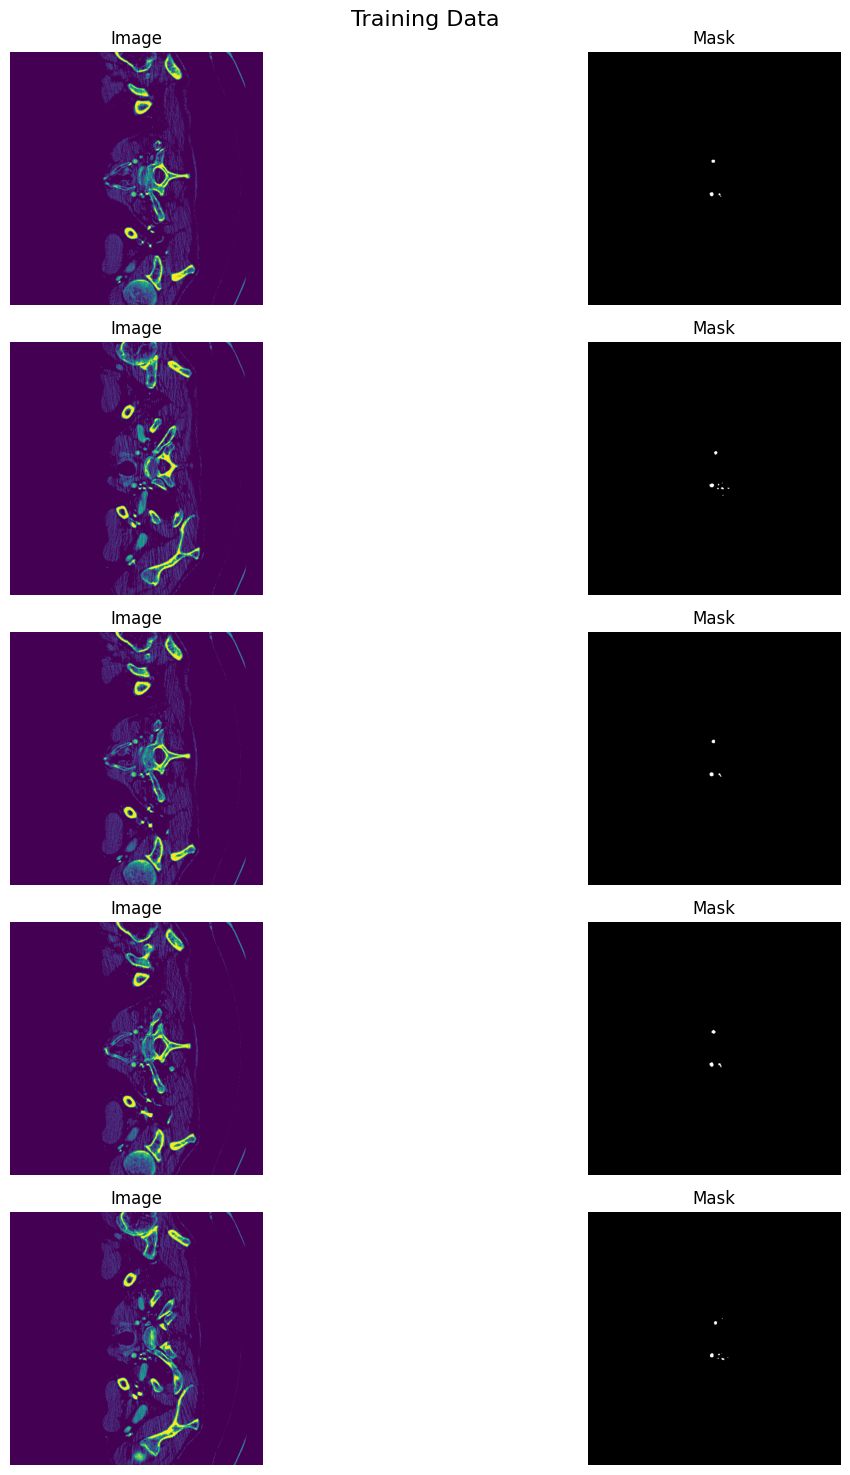

In [33]:
display_images(train_images, train_masks, "Training Data", num_samples=5)

In [34]:
import os
print("Test image files:", len(os.listdir("/kaggle/input/aortic-seg/data/slices/test/img")))
print("Test mask files:", len(os.listdir("/kaggle/input/aortic-seg/data/slices/test/img")))

Test image files: 1
Test mask files: 1


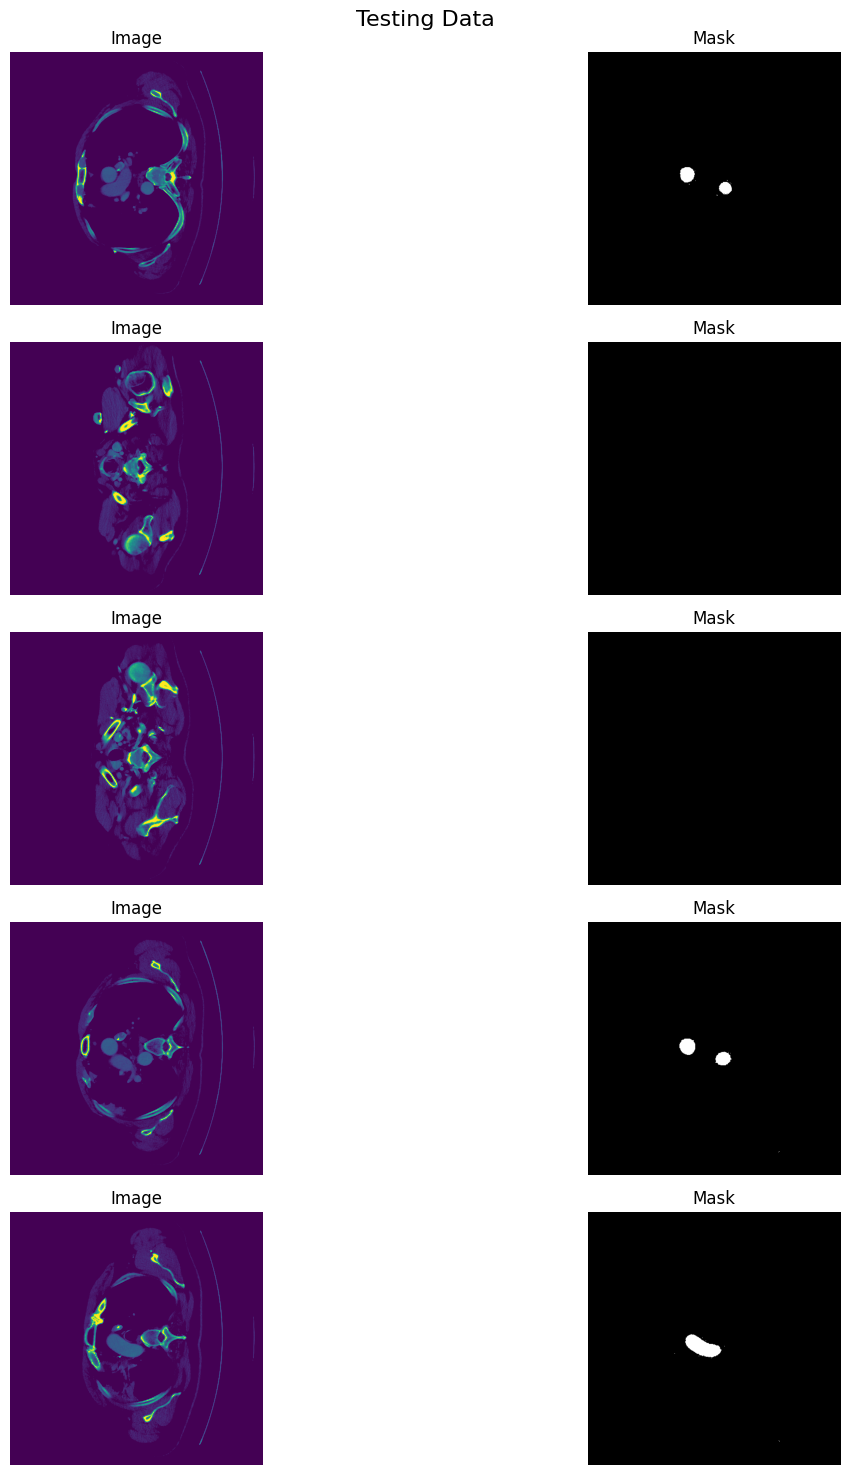

In [35]:
display_images(test_images, test_masks, "Testing Data", num_samples=5)

In [36]:
import os
import cv2

predict_img_path = "/kaggle/input/aortic-seg/data/slices/predict/img/img"
predict_mask_path = "/kaggle/input/aortic-seg/data/slices/predict/mask/img"

predict_images = []
predict_masks = []

# Load predict images
for f in sorted(os.listdir(predict_img_path)):
    path = os.path.join(predict_img_path, f)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        predict_images.append(img)

# Load predict masks
for f in sorted(os.listdir(predict_mask_path)):
    path = os.path.join(predict_mask_path, f)
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if mask is not None:
        predict_masks.append(mask)

print("✅ Number of predict images:", len(predict_images))
print("✅ Number of predict masks:", len(predict_masks))


✅ Number of predict images: 145
✅ Number of predict masks: 145


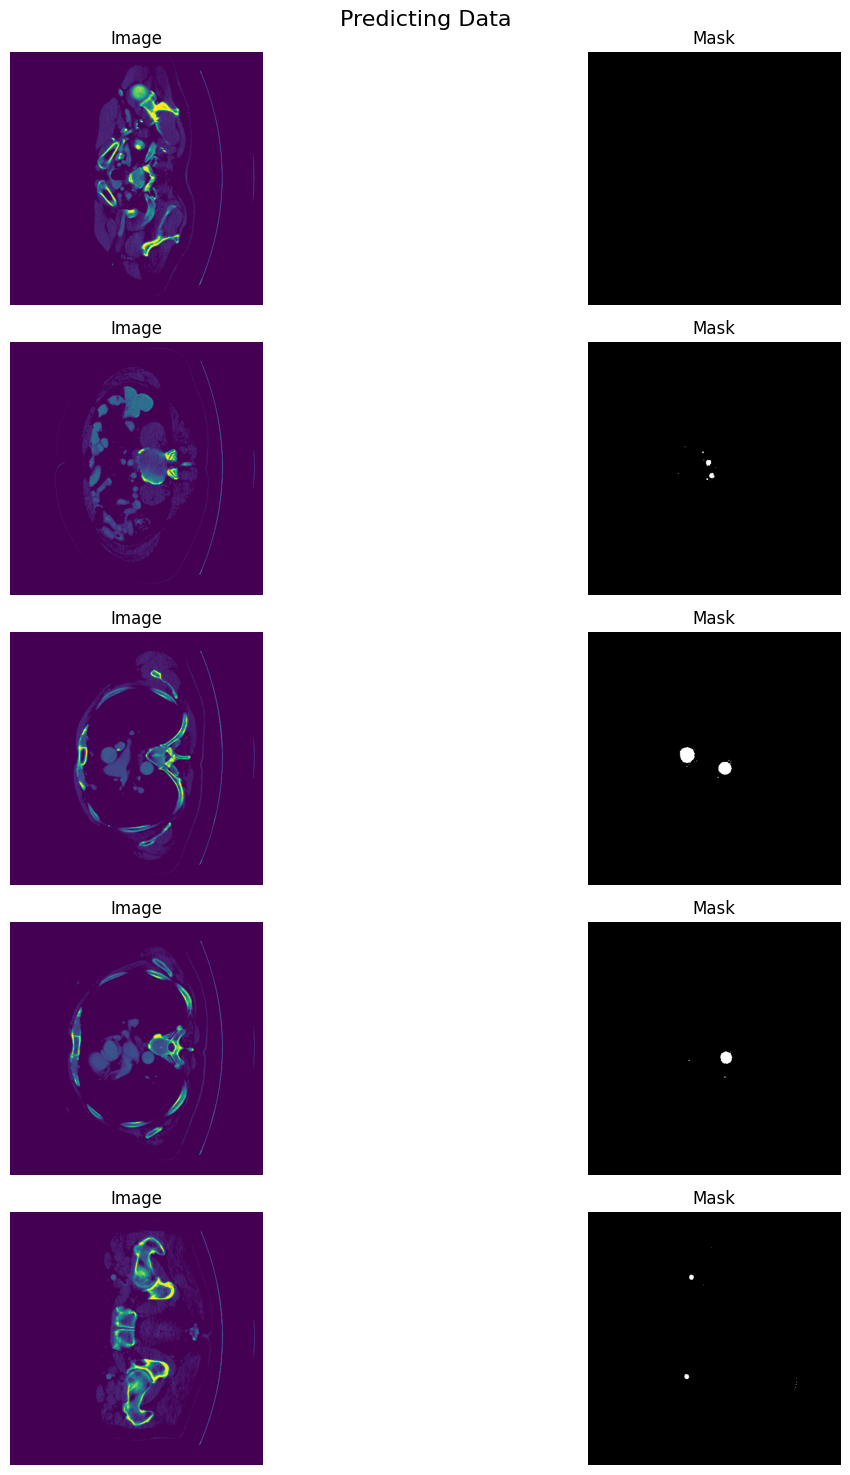

In [37]:
display_images(predict_images, predict_masks, "Predicting Data", num_samples=5)

# 1-Resizing

In [38]:
# Correct paths including the extra 'img' folder
train_img_path = "/kaggle/input/aortic-seg/data/slices/train/img/img"
train_mask_path = "/kaggle/input/aortic-seg/data/slices/train/mask/img"

test_img_path = "/kaggle/input/aortic-seg/data/slices/test/img/img"
test_mask_path = "/kaggle/input/aortic-seg/data/slices/test/mask/img"

predict_img_path = "/kaggle/input/aortic-seg/data/slices/predict/img/img"
predict_mask_path = "/kaggle/input/aortic-seg/data/slices/predict/mask/img"


In [39]:
print(os.listdir(train_img_path)[:5])
print(os.listdir(train_mask_path)[:5])


['aorta2-slice029_z.png', 'aorta4-slice1300_z.png', 'aorta9-slice076_z.png', 'aorta3-slice139_z.png', 'aorta10-slice067_z.png']
['aorta2-slice029_z.png', 'aorta4-slice1300_z.png', 'aorta9-slice076_z.png', 'aorta3-slice139_z.png', 'aorta10-slice067_z.png']



# Step 2: Contrast Enhancement (Histogram Equalization)



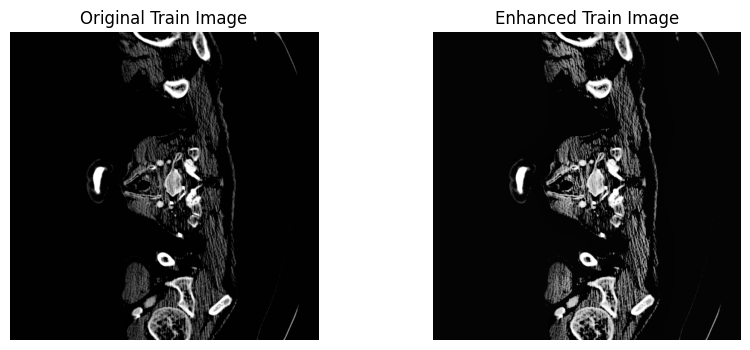

In [40]:
# Apply CLAHE (Contrast Enhancement)
def apply_clahe(images):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced_images = [clahe.apply(img) for img in images]
    return enhanced_images

# Enhance contrast in all datasets
train_images = apply_clahe(train_images)
test_images = apply_clahe(test_images)
predict_images = apply_clahe(predict_images)

# Show sample images before & after CLAHE
import matplotlib.pyplot as plt

def show_before_after(original, enhanced, title="Image"):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap="gray")
    plt.title(f"Original {title}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(enhanced, cmap="gray")
    plt.title(f"Enhanced {title}")
    plt.axis("off")

    plt.show()

# Display sample from train set
show_before_after(train_images[0], apply_clahe([train_images[0]])[0], title="Train Image")

# Step 3: Normalization & Data Augmentation

In [41]:
!pip install albumentations

In [42]:
!pip install tensorflow keras numpy matplotlib opencv-python scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 112.2 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
mkl-umath 0.1.1 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.0.2 which is incompatible.
mkl-random 1.2.4 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.0.2 which is incompatible.
mkl-fft 1.3.8 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.0.2 which is incompatible.
datasets 3.6.0 requires fsspec[http

In [43]:
!pip install --upgrade --force-reinstall numpy scipy scikit-learn

  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 114.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 120.4 MB/s  0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
  Attempting unins

In [44]:
!pip install numpy==1.26.4 scipy==1.11.4 scikit-learn==1.3.2 --force-reinstall

  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 104.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 138.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 130.6 MB/s  0:00:00
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting uninstall: scipy
    Found existin

In [45]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Dropout
from tensorflow.keras.models import Model


2025-08-24 15:56:03.551510: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756050963.727570      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756050963.779101      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/numpy/_core/_dtype.py:104: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
/usr/local/lib/python3.11/dist-packages/numpy/_core/_dtype.py:104: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.


In [46]:
!pip install --upgrade numpy==1.24.4 scipy==1.11.1 tensorflow==2.13.0

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install numpy==1.24.4, scipy==1.11.1 and tensorflow==2.13.0 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested numpy==1.24.4
    scipy 1.11.1 depends on numpy<1.28.0 and >=1.21.6
    tensorflow 2.13.0 depends on numpy<=1.24.3 and >=1.22

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


## import tensorflow as tf

In [47]:
## import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Dropout
from tensorflow.keras.models import Model

def unet_model(input_shape=(256, 256, 1)):
    inputs = Input(input_shape)

    # Encoder (downsampling path)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)

    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D((2, 2))(drop4)

    # Bottleneck
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Decoder (upsampling path)
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(drop5)
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    # Output layer (binary segmentation)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    # Build and compile model
    model = Model(inputs, outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create model
model = unet_model()
model.summary()


I0000 00:00:1756050977.088710      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756050977.089373      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32, 32,    │          0 │ conv2d_7[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ dropout[0][0]     │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 16, 16,    │          0 │ conv2d_9[0][0]  

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)